In [841]:
import pandas as pd
import glob
import openpyxl  # Ensure openpyxl is installed

# Path to the folder containing Excel files
folder_path = "/Users/ls/TTC delay/"  # Ensure this path is correct and exists

# Get a list of all Excel files in the folder
file_list = glob.glob(folder_path + "*.xlsx")

# Check if there are files to process
if not file_list:
    print("No Excel files found in the folder!")
else:
    # Read and combine all files into a single DataFrame
    df = pd.concat([pd.read_excel(file, engine="openpyxl") for file in file_list], ignore_index=True)

    # Display first few rows
    print(df.head())



        Date   Time     Day             Station   Code  Min Delay  Min Gap  \
0 2024-01-01  02:00  Monday    SHEPPARD STATION    MUI          0        0   
1 2024-01-01  02:00  Monday      DUNDAS STATION   MUIS          0        0   
2 2024-01-01  02:08  Monday      DUNDAS STATION  MUPAA          4       10   
3 2024-01-01  02:13  Monday  KENNEDY BD STATION  PUTDN         10       16   
4 2024-01-01  02:22  Monday       BLOOR STATION  MUPAA          4       10   

  Bound Line  Vehicle  
0     N   YU     5491  
1     N   YU        0  
2     N   YU     6051  
3     E   BD     5284  
4     N   YU     5986  


In [842]:
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0,0,N,YU,0
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986
...,...,...,...,...,...,...,...,...,...,...
69306,2023-12-31,12:25,Sunday,SHEPPARD-YONGE STATION,MUIR,7,14,W,SHP,6196
69307,2023-12-31,13:53,Sunday,BAYVIEW STATION,TUSC,0,0,E,SHP,6191
69308,2023-12-31,14:57,Sunday,SHEPPARD-YONGE STATION,MUO,51,58,W,SHP,6171
69309,2023-12-31,15:15,Sunday,BAYVIEW STATION,TUOPO,7,14,E,SHP,6141


In [843]:
print(df.info())  # Shows data types, non-null counts, and memory usage



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69311 entries, 0 to 69310
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       69311 non-null  datetime64[ns]
 1   Time       69311 non-null  object        
 2   Day        69311 non-null  object        
 3   Station    69311 non-null  object        
 4   Code       69311 non-null  object        
 5   Min Delay  69311 non-null  int64         
 6   Min Gap    69311 non-null  int64         
 7   Bound      45719 non-null  object        
 8   Line       69180 non-null  object        
 9   Vehicle    69311 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 5.3+ MB
None


In [844]:
print(df.describe())  # Summary stats like mean, min, max, std, etc.


                                Date     Min Delay       Min Gap       Vehicle
count                          69311  69311.000000  69311.000000  69311.000000
mean   2023-08-05 14:51:33.431056896      3.110026      4.547705   3259.123718
min              2022-01-01 00:00:00      0.000000      0.000000      0.000000
25%              2022-11-16 00:00:00      0.000000      0.000000      0.000000
50%              2023-08-25 00:00:00      0.000000      0.000000   5120.000000
75%              2024-05-04 00:00:00      4.000000      8.000000   5616.000000
max              2024-12-31 00:00:00    716.000000    719.000000   9546.000000
std                              NaN     10.439003     11.258063   2725.745512


In [845]:
import pandas as pd

# Drop rows with any missing values
df_cleaned = df.dropna()

# Display number of rows before and after cleaning
print("Rows before cleaning:", df.shape[0])
print("Rows after cleaning:", df_cleaned.shape[0])


Rows before cleaning: 69311
Rows after cleaning: 45703


In [846]:
print(df_cleaned.info())  # Shows data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 45703 entries, 0 to 69309
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       45703 non-null  datetime64[ns]
 1   Time       45703 non-null  object        
 2   Day        45703 non-null  object        
 3   Station    45703 non-null  object        
 4   Code       45703 non-null  object        
 5   Min Delay  45703 non-null  int64         
 6   Min Gap    45703 non-null  int64         
 7   Bound      45703 non-null  object        
 8   Line       45703 non-null  object        
 9   Vehicle    45703 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 3.8+ MB
None


In [847]:
df_cleaned

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0,0,N,YU,0
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986
...,...,...,...,...,...,...,...,...,...,...
69305,2023-12-31,01:53,Sunday,OSGOODE STATION,MUPAA,0,0,S,YU,6051
69306,2023-12-31,12:25,Sunday,SHEPPARD-YONGE STATION,MUIR,7,14,W,SHP,6196
69307,2023-12-31,13:53,Sunday,BAYVIEW STATION,TUSC,0,0,E,SHP,6191
69308,2023-12-31,14:57,Sunday,SHEPPARD-YONGE STATION,MUO,51,58,W,SHP,6171


In [848]:
# Convert the "Vehicle" column to String type
df_cleaned["Vehicle"] = df_cleaned["Vehicle"].astype(str)

# Verify the change
print(df_cleaned["Vehicle"].dtype)  # Should print 'object' (string in pandas)


object


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/825579373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Vehicle"] = df_cleaned["Vehicle"].astype(str)


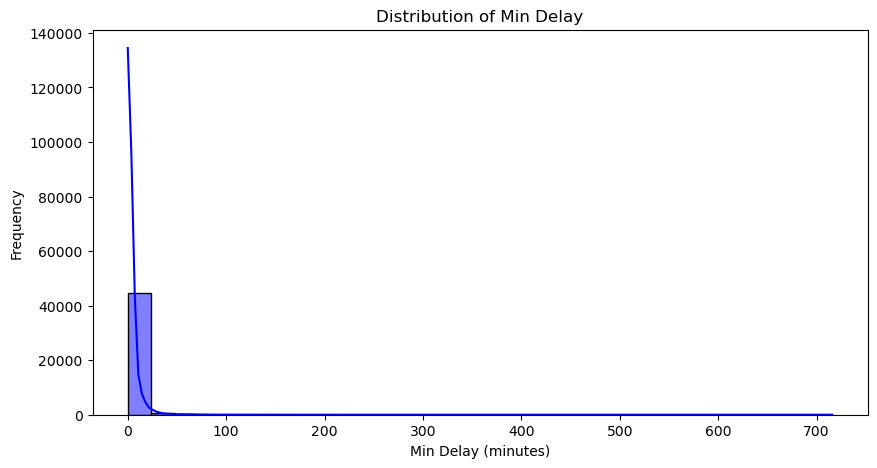

In [849]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histogram of Min Delay
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Min Delay"], bins=30, kde=True, color="blue")

plt.xlabel("Min Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Min Delay")
plt.show()


In [850]:
import pandas as pd

# Count occurrences where Min Delay = 0 and Min Delay > 0
min_delay_counts = {
    "Min Delay = 0": (df_cleaned["Min Delay"] == 0).sum(),
    "Min Delay > 0": (df_cleaned["Min Delay"] > 0).sum()
}

# Convert to DataFrame for better readability
min_delay_counts_df = pd.DataFrame.from_dict(min_delay_counts, orient="index", columns=["Count"])

# Display the counts
print(min_delay_counts_df)


               Count
Min Delay = 0  19429
Min Delay > 0  26274


In [851]:
# Remove rows where Min Delay is 0
df_cleaned = df_cleaned[df_cleaned["Min Delay"] > 0]

In [852]:
df_cleaned

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986
5,2024-01-01,02:25,Monday,ST CLAIR STATION,MUPAA,3,9,N,YU,6051
7,2024-01-01,02:27,Monday,WOODBINE STATION,EUDO,7,13,E,BD,5077
...,...,...,...,...,...,...,...,...,...,...
69299,2023-12-31,01:20,Sunday,WELLESLEY STATION,MUIR,15,21,N,YU,5406
69304,2023-12-31,01:46,Sunday,WELLESLEY STATION,MUPAA,4,10,N,YU,5576
69306,2023-12-31,12:25,Sunday,SHEPPARD-YONGE STATION,MUIR,7,14,W,SHP,6196
69308,2023-12-31,14:57,Sunday,SHEPPARD-YONGE STATION,MUO,51,58,W,SHP,6171


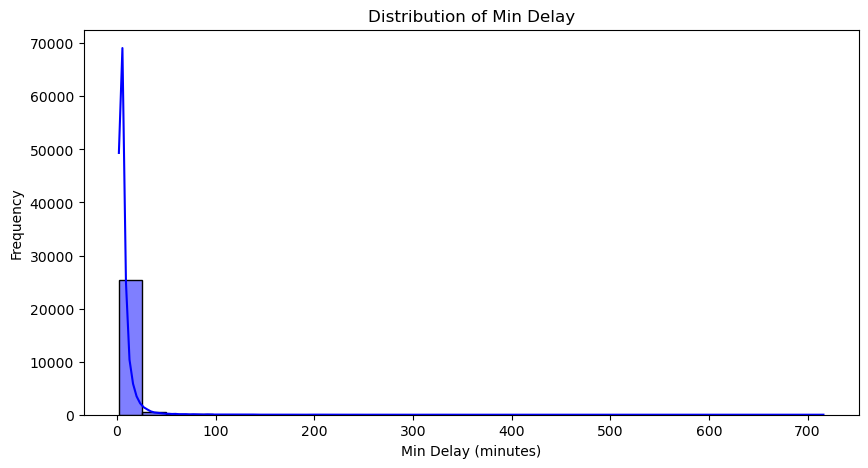

In [853]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histogram of Min Delay
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Min Delay"], bins=30, kde=True, color="blue")

plt.xlabel("Min Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Min Delay")
plt.show()

In [854]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26274 entries, 2 to 69309
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       26274 non-null  datetime64[ns]
 1   Time       26274 non-null  object        
 2   Day        26274 non-null  object        
 3   Station    26274 non-null  object        
 4   Code       26274 non-null  object        
 5   Min Delay  26274 non-null  int64         
 6   Min Gap    26274 non-null  int64         
 7   Bound      26274 non-null  object        
 8   Line       26274 non-null  object        
 9   Vehicle    26274 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 2.2+ MB
None


In [855]:
# Summary statistics for numerical columns
summary_stats = df_cleaned.describe()

# Display summary statistics
print(summary_stats)

                                Date     Min Delay       Min Gap
count                          26274  26274.000000  26274.000000
mean   2023-07-04 04:25:55.423612672      8.083619     11.828804
min              2022-01-01 00:00:00      2.000000      0.000000
25%              2022-09-26 00:00:00      3.000000      7.000000
50%              2023-07-04 00:00:00      5.000000      9.000000
75%              2024-04-11 00:00:00      8.000000     12.000000
max              2024-12-31 00:00:00    716.000000    719.000000
std                              NaN     15.335129     15.336937


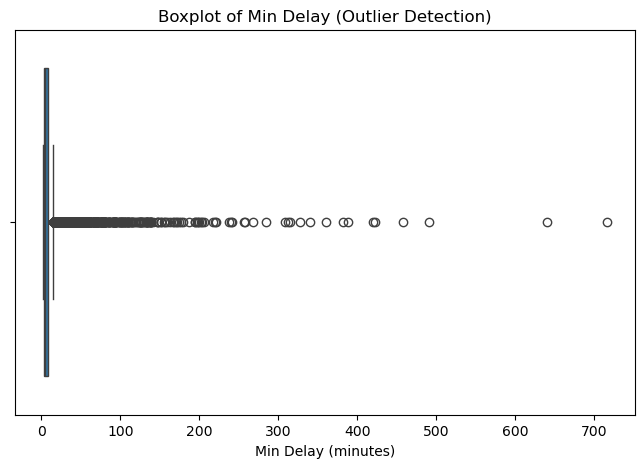

In [856]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to detect outliers in Min Delay
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["Min Delay"])

plt.xlabel("Min Delay (minutes)")
plt.title("Boxplot of Min Delay (Outlier Detection)")
plt.show()


In [857]:
# Count the number of delays per station
station_counts = df_cleaned["Station"].value_counts().head(5)  # Top 5 stations with most delays

In [858]:
station_counts

Station
FINCH STATION         1118
EGLINTON STATION      1056
KENNEDY BD STATION     900
KIPLING STATION        873
BLOOR STATION          804
Name: count, dtype: int64

/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/949741949.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_counts.values, y=station_counts.index, palette="viridis")


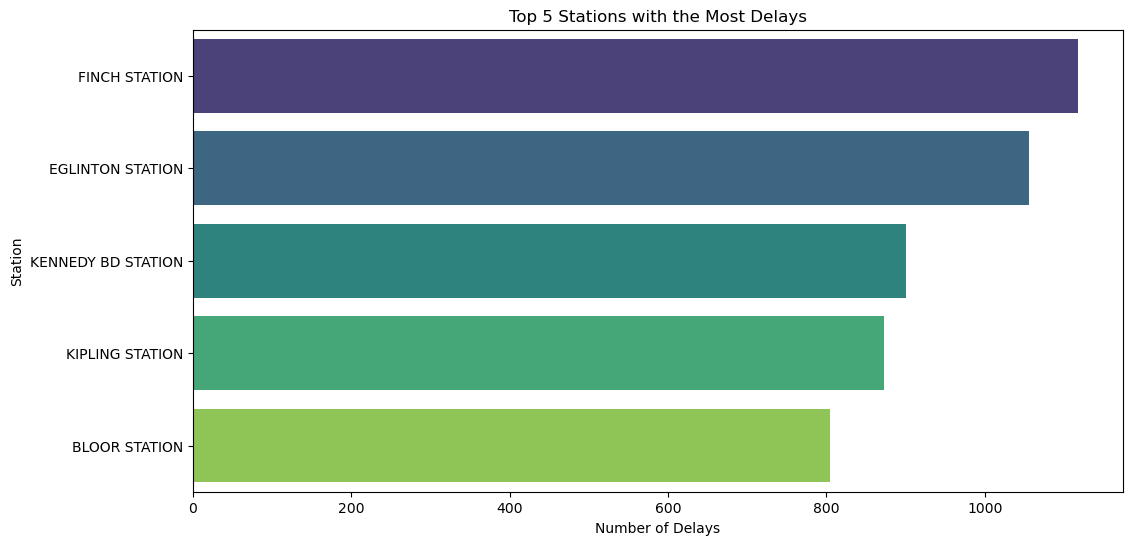

In [859]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each station
station_counts = df_cleaned["Station"].value_counts().head(5)  # Top 5 stations

# Plot bar chart for Station distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=station_counts.values, y=station_counts.index, palette="viridis")

plt.xlabel("Number of Delays")
plt.ylabel("Station")
plt.title("Top 5 Stations with the Most Delays")
plt.show()


In [860]:
# Define the list of five stations to keep
selected_stations = ["BLOOR STATION", "KIPLING STATION", "FINCH STATION", "EGLINTON STATION", "KENNEDY BD STATION"]  # Replace with actual station names

# Filter the dataset to keep only these stations
df_cleaned = df_cleaned[df_cleaned["Station"].isin(selected_stations)]

# Display the number of remaining records
print("Rows after keeping only selected stations:", df_cleaned.shape[0])

Rows after keeping only selected stations: 4751


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/3289959940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Delay Band"] = pd.cut(df_cleaned["Min Delay"], bins=bin_edges, labels=bin_labels, right=False)
/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/3289959940.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_band_counts_filtered.index, y=delay_band_counts_filtered.values, palette="viridis")


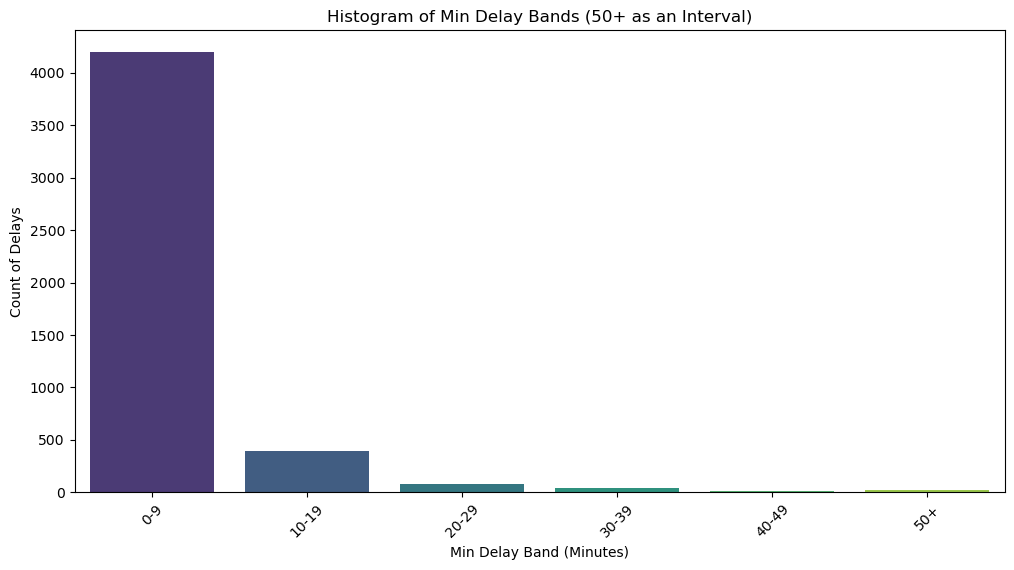

In [861]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_cleaned is defined before running this code

# Create bins for Min Delay in 10-minute intervals, with a single interval for delays > 50
bin_edges = [0, 10, 20, 30, 40, 50, df_cleaned["Min Delay"].max() + 1]  # Last bin is for >50
bin_labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50+"]

# Categorize delays into bins
df_cleaned["Delay Band"] = pd.cut(df_cleaned["Min Delay"], bins=bin_edges, labels=bin_labels, right=False)

# Count occurrences for each delay band
delay_band_counts_filtered = df_cleaned["Delay Band"].value_counts().sort_index()

# Plot histogram for Delay Bands
plt.figure(figsize=(12, 6))
sns.barplot(x=delay_band_counts_filtered.index, y=delay_band_counts_filtered.values, palette="viridis")

plt.xlabel("Min Delay Band (Minutes)")
plt.ylabel("Count of Delays")
plt.title("Histogram of Min Delay Bands (50+ as an Interval)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [862]:
# Count the number of occurrences of Min Delay for each Delay Band
delay_band_counts = df_cleaned.groupby("Delay Band")["Min Delay"].count().sort_index()

# Display the counts
print(delay_band_counts)




Delay Band
0-9      4197
10-19     394
20-29      82
30-39      45
40-49      12
50+        21
Name: Min Delay, dtype: int64


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/1739959870.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_band_counts = df_cleaned.groupby("Delay Band")["Min Delay"].count().sort_index()


In [863]:
# Remove rows where Min Delay is greater than 50
df_cleaned = df_cleaned[df_cleaned["Min Delay"] <= 50]

# Display the number of remaining records
print("Rows after removing Min Delay > 50:", df_cleaned.shape[0])


Rows after removing Min Delay > 50: 4731


In [864]:
print(df_cleaned.info())  # Shows data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 4731 entries, 3 to 69287
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4731 non-null   datetime64[ns]
 1   Time        4731 non-null   object        
 2   Day         4731 non-null   object        
 3   Station     4731 non-null   object        
 4   Code        4731 non-null   object        
 5   Min Delay   4731 non-null   int64         
 6   Min Gap     4731 non-null   int64         
 7   Bound       4731 non-null   object        
 8   Line        4731 non-null   object        
 9   Vehicle     4731 non-null   object        
 10  Delay Band  4731 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 411.4+ KB
None


In [865]:
df_cleaned

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Delay Band
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284,10-19
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986,0-9
10,2024-01-01,02:36,Monday,FINCH STATION,MUI,24,30,S,YU,5931,20-29
21,2024-01-01,08:41,Monday,EGLINTON STATION,TUNOA,6,12,N,YU,0,0-9
27,2024-01-01,10:08,Monday,EGLINTON STATION,TUNOA,6,12,N,YU,0,0-9
...,...,...,...,...,...,...,...,...,...,...,...
69237,2023-12-31,08:06,Sunday,FINCH STATION,TUNOA,6,12,S,YU,0,0-9
69244,2023-12-31,08:24,Sunday,FINCH STATION,TUNOA,6,12,S,YU,0,0-9
69250,2023-12-31,10:34,Sunday,EGLINTON STATION,TUNOA,4,8,N,YU,0,0-9
69262,2023-12-31,14:59,Sunday,EGLINTON STATION,MUPAA,4,8,S,YU,5496,0-9


In [866]:
import pandas as pd

# Generate statistics for the 'Bound' variable
bound_stats = df_cleaned["Bound"].describe(include="all")

# Display the statistics
print(bound_stats)


count     4731
unique       4
top          S
freq      1898
Name: Bound, dtype: object


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/1116272062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bound_counts.index, y=bound_counts.values, palette="viridis")


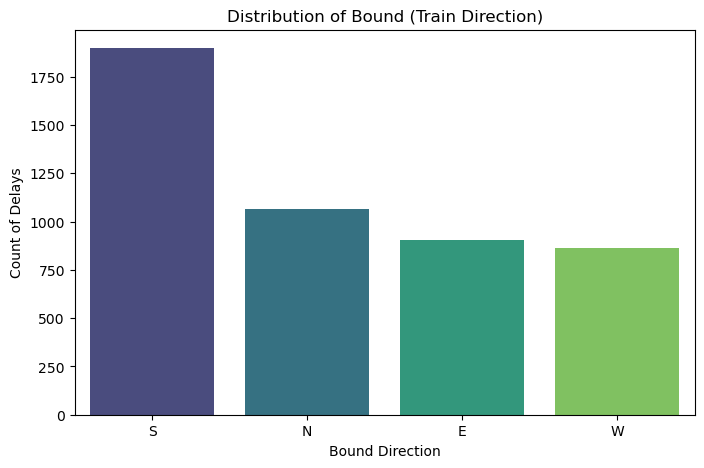

In [867]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each unique value in Bound
bound_counts = df_cleaned["Bound"].value_counts()

# Plot bar chart for Bound distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=bound_counts.index, y=bound_counts.values, palette="viridis")

plt.xlabel("Bound Direction")
plt.ylabel("Count of Delays")
plt.title("Distribution of Bound (Train Direction)")
plt.show()


In [868]:
# Count occurrences of each unique value in Bound
bound_counts = df_cleaned["Bound"].value_counts()

# Display the counts
print(bound_counts)




Bound
S    1898
N    1065
E     906
W     862
Name: count, dtype: int64


In [869]:
import pandas as pd

# Define seasons based on the month
def categorize_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Convert "Date" column to datetime format (if not already)
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

# Apply the function to categorize each date into a season
df_cleaned["Season"] = df_cleaned["Date"].apply(categorize_season)

# Remove the "Date" column after categorizing into seasons
df_cleaned = df_cleaned.drop(columns=["Date"], errors="ignore")

# Display the first few rows to verify
print(df_cleaned.head())



     Time     Day             Station   Code  Min Delay  Min Gap Bound Line  \
3   02:13  Monday  KENNEDY BD STATION  PUTDN         10       16     E   BD   
4   02:22  Monday       BLOOR STATION  MUPAA          4       10     N   YU   
10  02:36  Monday       FINCH STATION    MUI         24       30     S   YU   
21  08:41  Monday    EGLINTON STATION  TUNOA          6       12     N   YU   
27  10:08  Monday    EGLINTON STATION  TUNOA          6       12     N   YU   

   Vehicle Delay Band  Season  
3     5284      10-19  Winter  
4     5986        0-9  Winter  
10    5931      20-29  Winter  
21       0        0-9  Winter  
27       0        0-9  Winter  


In [870]:
# Define time categories based on the hour of the day
def categorize_time(time):
    hour = int(time.split(":")[0])  # Extract hour from time string
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the function to categorize each time into a time period
df_cleaned["Time Period"] = df_cleaned["Time"].apply(categorize_time)

# Remove the original "Time" column

df_cleaned = df_cleaned.drop(columns=["Time"], errors="ignore")

# Display the first few rows to verify

print(df_cleaned.head())


       Day             Station   Code  Min Delay  Min Gap Bound Line Vehicle  \
3   Monday  KENNEDY BD STATION  PUTDN         10       16     E   BD    5284   
4   Monday       BLOOR STATION  MUPAA          4       10     N   YU    5986   
10  Monday       FINCH STATION    MUI         24       30     S   YU    5931   
21  Monday    EGLINTON STATION  TUNOA          6       12     N   YU       0   
27  Monday    EGLINTON STATION  TUNOA          6       12     N   YU       0   

   Delay Band  Season Time Period  
3       10-19  Winter       Night  
4         0-9  Winter       Night  
10      20-29  Winter       Night  
21        0-9  Winter     Morning  
27        0-9  Winter     Morning  


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/2959335340.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")


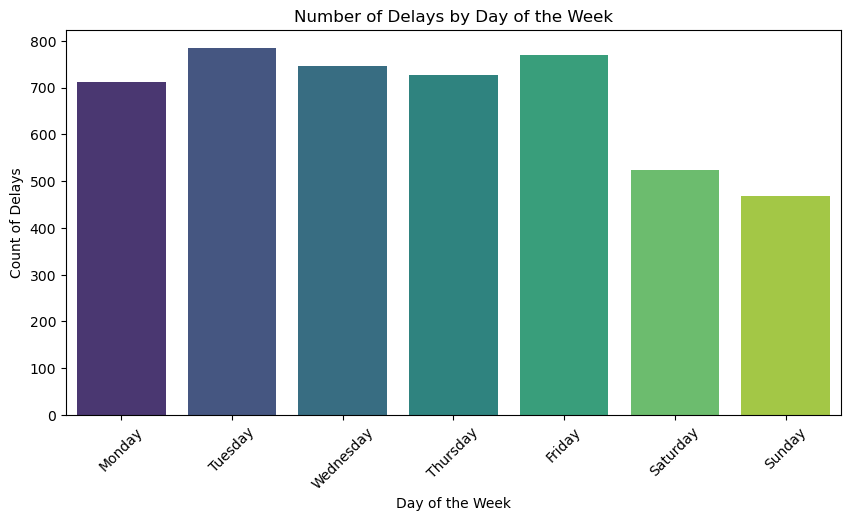

In [871]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct order for days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Count occurrences of each day and reorder based on the defined order
day_counts = df_cleaned["Day"].value_counts().reindex(day_order)

# Plot bar chart for Day distribution in correct order
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")

plt.xlabel("Day of the Week")
plt.ylabel("Count of Delays")
plt.title("Number of Delays by Day of the Week")
plt.xticks(rotation=45)
plt.show()


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/2919783553.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_period_counts.index, y=time_period_counts.values, palette="viridis")


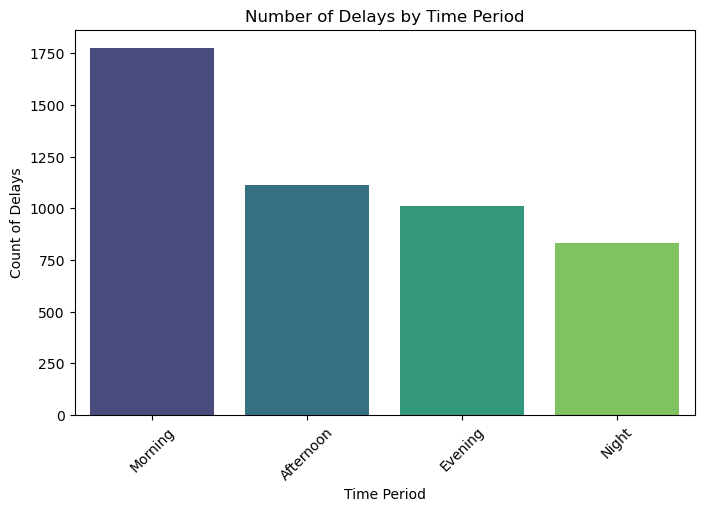

In [872]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct order for time periods
time_period_order = ["Morning", "Afternoon", "Evening", "Night"]

# Count occurrences of each time period and reorder them
time_period_counts = df_cleaned["Time Period"].value_counts().reindex(time_period_order)

# Plot bar chart for Time Period distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=time_period_counts.index, y=time_period_counts.values, palette="viridis")

plt.xlabel("Time Period")
plt.ylabel("Count of Delays")
plt.title("Number of Delays by Time Period")
plt.xticks(rotation=45)
plt.show()


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/2896537177.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette="viridis")


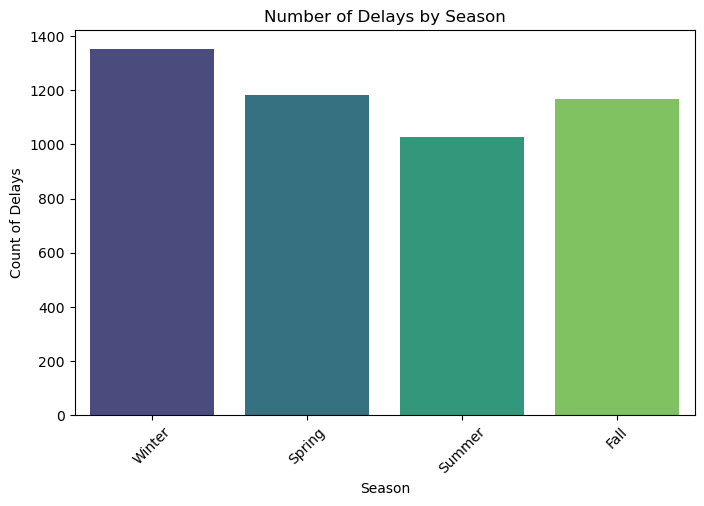

In [873]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct order for seasons
season_order = ["Winter", "Spring", "Summer", "Fall"]

# Count occurrences of each season and reorder them
season_counts = df_cleaned["Season"].value_counts().reindex(season_order)

# Plot bar chart for Season distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="viridis")

plt.xlabel("Season")
plt.ylabel("Count of Delays")
plt.title("Number of Delays by Season")
plt.xticks(rotation=45)
plt.show()


In [874]:
df_cleaned


,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Delay Band,Season,Time Period
3,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284,10-19,Winter,Night
4,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986,0-9,Winter,Night
10,Monday,FINCH STATION,MUI,24,30,S,YU,5931,20-29,Winter,Night
21,Monday,EGLINTON STATION,TUNOA,6,12,N,YU,0,0-9,Winter,Morning
27,Monday,EGLINTON STATION,TUNOA,6,12,N,YU,0,0-9,Winter,Morning
...,...,...,...,...,...,...,...,...,...,...,...
69237,Sunday,FINCH STATION,TUNOA,6,12,S,YU,0,0-9,Winter,Morning
69244,Sunday,FINCH STATION,TUNOA,6,12,S,YU,0,0-9,Winter,Morning
69250,Sunday,EGLINTON STATION,TUNOA,4,8,N,YU,0,0-9,Winter,Morning
69262,Sunday,EGLINTON STATION,MUPAA,4,8,S,YU,5496,0-9,Winter,Afternoon


In [875]:
import pandas as pd

# Define a dictionary mapping each Code to its corresponding category
issue_categories = {
    "Electrical and Mechanical Systems (Train Equipment & Power)": 
        ["EUAC", "ERAC", "EUAL", "EUATC", "EUCH", "EUHV", "ERHV", "EULT", "ERLT", "EULV", 
         "ERLV", "EUPI", "ERPR", "EUSC", "MUSC", "EUTM", "EUTL", "ERTL", "PRSP", "PUSTP", 
         "PUSCA", "PUSI", "PUSIO", "PUSIS", "PUSNT"],

    "Train Operations & Control Systems": 
        ["ERTC", "PRSA", "PUSAC", "PRSL", "PRSO", "PUATC", "PRSW", "PRTST", "PUSTS", "PUCBI", 
         "PUCSS", "PUSLC", "PUTSC", "PUCSS", "PUDCS", "PUOPO", "PUSBE", "PUSSW", "PUSTC", 
         "PUSWZ", "PUSZC", "TUCC", "TRTC", "TUSET", "TRSET"],

    "Structural & Track-Related Issues": 
        ["PRW", "PUTR", "PUTTP", "PUTCD", "PUTD", "PUTIJ", "PUTNT", "PUTO", "PUTOE", "TUOPO", 
         "PUTS", "PUTSM", "PUTTC", "PUTWZ", "PUSO"],

    "Human & Operational Factors": 
        ["MUESA", "TUNOA", "TRNOA", "TUKEY", "TUML", "TUMVS", "TUNIP", "TRNIP", "TUO", "TRO", 
         "TUOS", "TUS", "TUSC", "TUSUP", "MUWR", "MUIE", "MRIE", "SUAE", "SRAE", "SUCOL", 
         "SRCOL", "SUEAS", "SREAS", "PUSEA", "SUO", "SRO"],

    "Miscellaneous & Passenger-Related Incidents": 
        ["EUDO", "ERDO", "EUOE", "MUCL", "MRCL", "MUEC", "MREC", "MUGD", "MUODC", "MUPAA", 
         "MRPAA", "PUMEL", "PREL", "PRO", "PRS", "PUMST", "PRST", "PUMO", "MUTO", "MUO", "MRO"]
}

# Create a function to categorize issues based on their Code
def categorize_issue(code):
    for category, codes in issue_categories.items():
        if code in codes:
            return category
    return "Other"  # Default category if not found

# Apply the categorization to create a new column "Issue Category"
df_cleaned["Issue Category"] = df_cleaned["Code"].apply(categorize_issue)

# Display the first few rows to verify the categorization
print(df_cleaned[["Code", "Issue Category"]].head())


     Code                               Issue Category
3   PUTDN                                        Other
4   MUPAA  Miscellaneous & Passenger-Related Incidents
10    MUI                                        Other
21  TUNOA                  Human & Operational Factors
27  TUNOA                  Human & Operational Factors


In [876]:
import pandas as pd

# Count occurrences of each Issue Category
issue_category_counts = df_cleaned["Issue Category"].value_counts()

# Convert to DataFrame for better readability
issue_category_counts_df = issue_category_counts.to_frame().reset_index()
issue_category_counts_df.columns = ["Issue Category", "Count"]

# Display the counts
print(issue_category_counts_df)


                                      Issue Category  Count
0                                              Other   2531
1                        Human & Operational Factors   1062
2        Miscellaneous & Passenger-Related Incidents    694
3                 Train Operations & Control Systems    204
4                  Structural & Track-Related Issues    124
5  Electrical and Mechanical Systems (Train Equip...    116


In [877]:
import pandas as pd

# Remove specified columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=["Delay Band", "Code"], errors="ignore")

# Display the first few rows to verify
print(df_cleaned.head())


       Day             Station  Min Delay  Min Gap Bound Line Vehicle  Season  \
3   Monday  KENNEDY BD STATION         10       16     E   BD    5284  Winter   
4   Monday       BLOOR STATION          4       10     N   YU    5986  Winter   
10  Monday       FINCH STATION         24       30     S   YU    5931  Winter   
21  Monday    EGLINTON STATION          6       12     N   YU       0  Winter   
27  Monday    EGLINTON STATION          6       12     N   YU       0  Winter   

   Time Period                               Issue Category  
3        Night                                        Other  
4        Night  Miscellaneous & Passenger-Related Incidents  
10       Night                                        Other  
21     Morning                  Human & Operational Factors  
27     Morning                  Human & Operational Factors  


In [878]:
# Reorder the columns in df_cleaned
df_cleaned = df_cleaned[[
    "Min Delay", "Season", "Day", "Time Period", 
    "Station", "Bound", "Line", "Min Gap", "Issue Category"
]]

# Display the first few rows to verify the order
print(df_cleaned.head())


    Min Delay  Season     Day Time Period             Station Bound Line  \
3          10  Winter  Monday       Night  KENNEDY BD STATION     E   BD   
4           4  Winter  Monday       Night       BLOOR STATION     N   YU   
10         24  Winter  Monday       Night       FINCH STATION     S   YU   
21          6  Winter  Monday     Morning    EGLINTON STATION     N   YU   
27          6  Winter  Monday     Morning    EGLINTON STATION     N   YU   

    Min Gap                               Issue Category  
3        16                                        Other  
4        10  Miscellaneous & Passenger-Related Incidents  
10       30                                        Other  
21       12                  Human & Operational Factors  
27       12                  Human & Operational Factors  


In [ ]:
 # Save df_cleaned to a CSV file
#df_cleaned.to_csv("df_cleaned.csv", index=False)

#print("Dataset saved as 'df_cleaned.csv'")


Dataset saved as 'df_cleaned.csv'


In [880]:
import pandas as pd

# Calculate correlation
correlation = df_cleaned[["Min Delay", "Min Gap"]].corr()

# Display the correlation value
print("Correlation between Min Delay and Min Gap:")
print(correlation)


Correlation between Min Delay and Min Gap:
           Min Delay   Min Gap
Min Delay   1.000000  0.824631
Min Gap     0.824631  1.000000


In [881]:
df_cleaned

,Min Delay,Season,Day,Time Period,Station,Bound,Line,Min Gap,Issue Category
3,10,Winter,Monday,Night,KENNEDY BD STATION,E,BD,16,Other
4,4,Winter,Monday,Night,BLOOR STATION,N,YU,10,Miscellaneous & Passenger-Related Incidents
10,24,Winter,Monday,Night,FINCH STATION,S,YU,30,Other
21,6,Winter,Monday,Morning,EGLINTON STATION,N,YU,12,Human & Operational Factors
27,6,Winter,Monday,Morning,EGLINTON STATION,N,YU,12,Human & Operational Factors
...,...,...,...,...,...,...,...,...,...
69237,6,Winter,Sunday,Morning,FINCH STATION,S,YU,12,Human & Operational Factors
69244,6,Winter,Sunday,Morning,FINCH STATION,S,YU,12,Human & Operational Factors
69250,4,Winter,Sunday,Morning,EGLINTON STATION,N,YU,8,Human & Operational Factors
69262,4,Winter,Sunday,Afternoon,EGLINTON STATION,S,YU,8,Miscellaneous & Passenger-Related Incidents


In [882]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Encode categorical variables
categorical_features = ["Day", "Station", "Bound", "Line", "Season", "Time Period", "Issue Category"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store encoders for future use

# Define the target variable and predictor variables
X = df_cleaned.drop(columns=["Min Delay"])  # All variables except "Min Delay"
y = df_cleaned["Min Delay"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (improves model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display model performance metrics
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Show feature importance (coefficients)
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": lr_model.coef_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by="Coefficient", ascending=False))


Model Performance:
Mean Absolute Error (MAE): 1.46
Mean Squared Error (MSE): 10.72
Root Mean Squared Error (RMSE): 3.27
R² Score: 0.54

Feature Importance:
          Feature  Coefficient
6         Min Gap     4.389563
7  Issue Category     0.251519
1             Day     0.078890
5            Line     0.019951
2     Time Period    -0.036174
0          Season    -0.047906
4           Bound    -0.100841
3         Station    -0.218665


Decision Tree Model Performance:
Mean Absolute Error (MAE): 0.84
Mean Squared Error (MSE): 7.79
Root Mean Squared Error (RMSE): 2.79
R² Score: 0.66

Feature Importance:
          Feature  Importance
6         Min Gap    0.915410
1             Day    0.029889
7  Issue Category    0.013406
0          Season    0.013106
3         Station    0.012071
2     Time Period    0.007517
4           Bound    0.007151
5            Line    0.001449


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/2580177349.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")


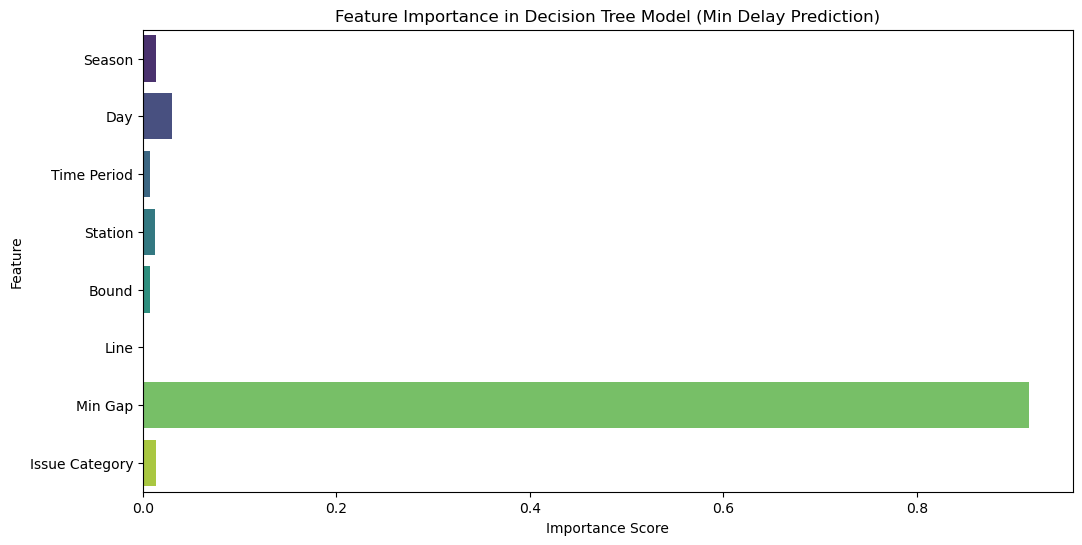

In [883]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Encode categorical variables
categorical_features = ["Day", "Station", "Bound", "Line", "Season", "Time Period", "Issue Category"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store encoders for future use

# Define the target variable and predictor variables
X = df_cleaned.drop(columns=["Min Delay"])  # All variables except "Min Delay"
y = df_cleaned["Min Delay"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display model performance metrics
print("Decision Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Show feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": dt_model.feature_importances_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by="Importance", ascending=False))

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree Model (Min Delay Prediction)")
plt.show()


Random Forest Model Performance:
Mean Absolute Error (MAE): 0.71
Mean Squared Error (MSE): 3.71
Root Mean Squared Error (RMSE): 1.93
R² Score: 0.84

Feature Importance:
          Feature  Importance
6         Min Gap    0.912283
1             Day    0.022979
0          Season    0.017361
7  Issue Category    0.013786
4           Bound    0.013319
3         Station    0.010135
2     Time Period    0.008452
5            Line    0.001685


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/4232052145.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")


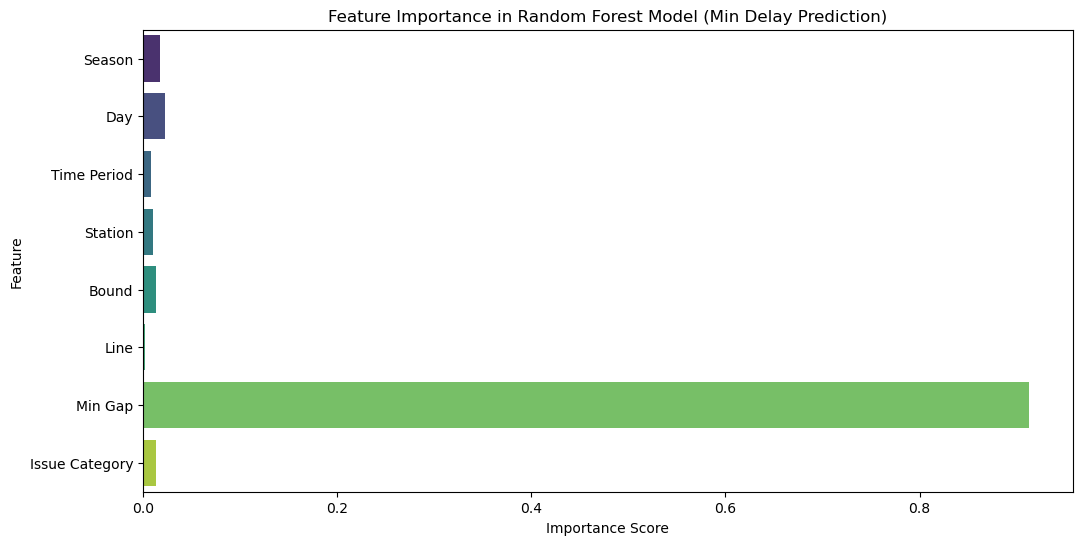

In [884]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Encode categorical variables
categorical_features = ["Day", "Station", "Bound", "Line", "Season", "Time Period", "Issue Category"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store encoders for future use

# Define the target variable and predictor variables
X = df_cleaned.drop(columns=["Min Delay"])  # All variables except "Min Delay"
y = df_cleaned["Min Delay"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display model performance metrics
print("Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Show feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by="Importance", ascending=False))

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model (Min Delay Prediction)")
plt.show()


Decision Tree Model Performance:
Mean Absolute Error (MAE): 2.79
Mean Squared Error (MSE): 23.22
Root Mean Squared Error (RMSE): 4.82
R² Score: -0.00


/var/folders/2k/1dcg58fd1jdd5z4qzlsv243r0000gn/T/ipykernel_23826/2288172599.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")


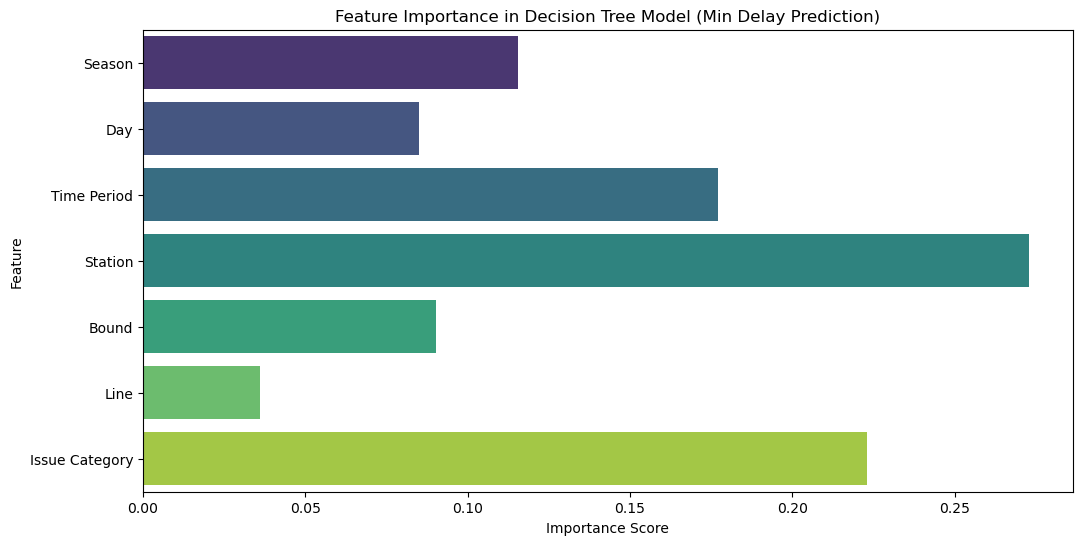

In [885]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Encode categorical variables
categorical_features = ["Day", "Station", "Bound", "Line", "Season", "Time Period", "Issue Category"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store encoders for future use

# Define the target variable and predictor variables, dropping "Min Gap"
X = df_cleaned.drop(columns=["Min Delay", "Min Gap"])  # All variables except "Min Delay" and "Min Gap"
y = df_cleaned["Min Delay"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (improves model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Decision Tree Regression model (Binary Tree)
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust max_depth as needed
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display model performance metrics
print("Decision Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": dt_model.feature_importances_})

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree Model (Min Delay Prediction)")
plt.show()


In [ ]:
# Train a Decision Tree model excluding Min Gap
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": dt_model.feature_importances_})
print(feature_importance.sort_values(by="Importance", ascending=False))


          Feature  Importance
3         Station    0.272802
6  Issue Category    0.223047
2     Time Period    0.177055
0          Season    0.115491
4           Bound    0.090393
1             Day    0.085146
5            Line    0.036066
